In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [74]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [75]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot: xlabel='Pclass', ylabel='count'>

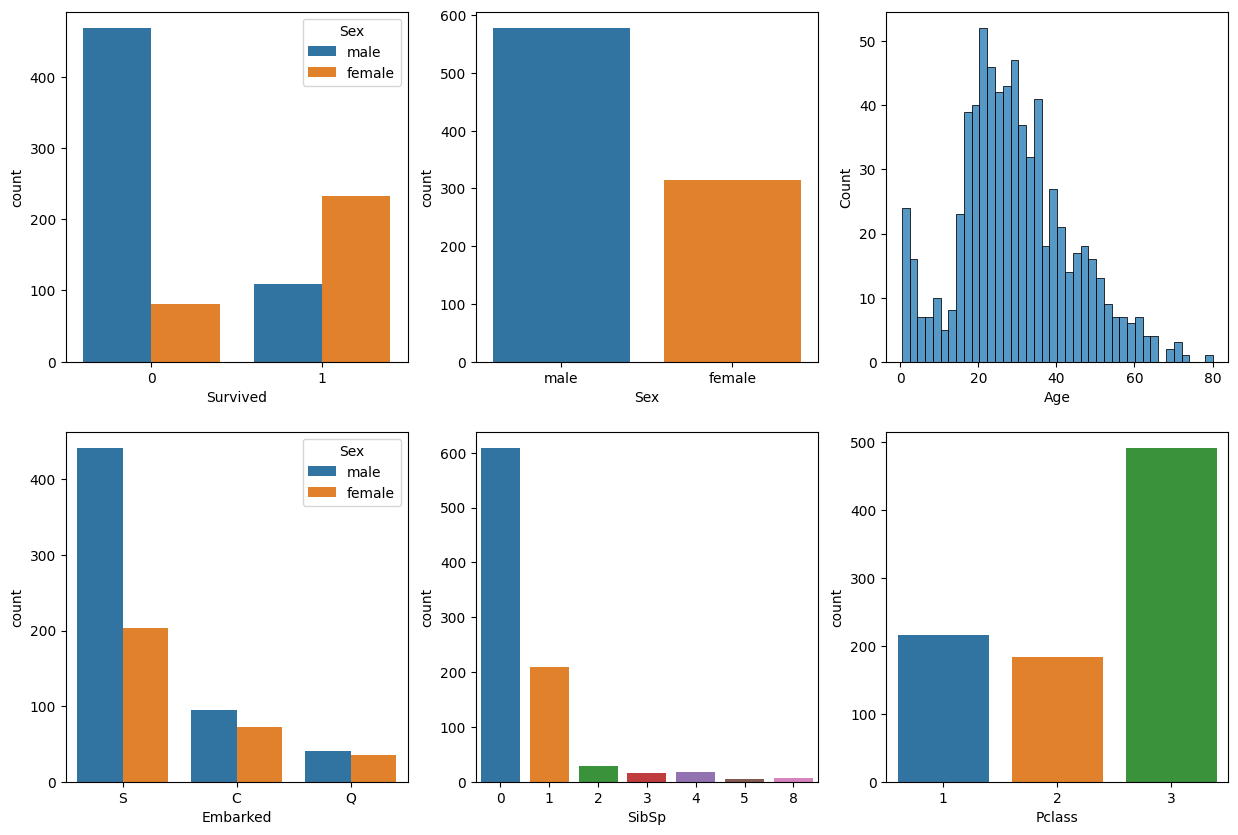

In [76]:
fig, axs = plt.subplots(2,3,figsize=(15,10))
sns.countplot(data=train, x='Survived',ax=axs[0,0],hue='Sex')
sns.countplot(data=train, x='Sex',ax=axs[0,1])
sns.histplot(data=train, x='Age', ax=axs[0,2], bins=40)
sns.countplot(data=train, x='Embarked', ax=axs[1,0],hue='Sex')
sns.countplot(data=train, x='SibSp', ax=axs[1,1])
sns.countplot(data=train, x='Pclass', ax=axs[1,2])
# sns.

<AxesSubplot: >

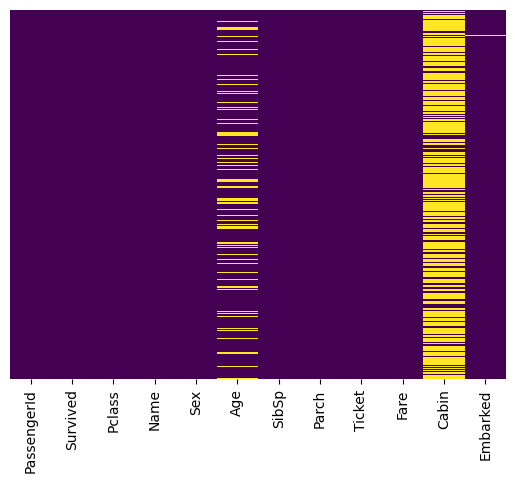

In [77]:
NAs = pd.isna(train)
sns.heatmap(NAs, yticklabels=False,cbar=False,cmap='viridis')

In [78]:
train.drop('Cabin',axis=1,inplace=True)
test.drop('Cabin',axis=1,inplace=True)

<AxesSubplot: >

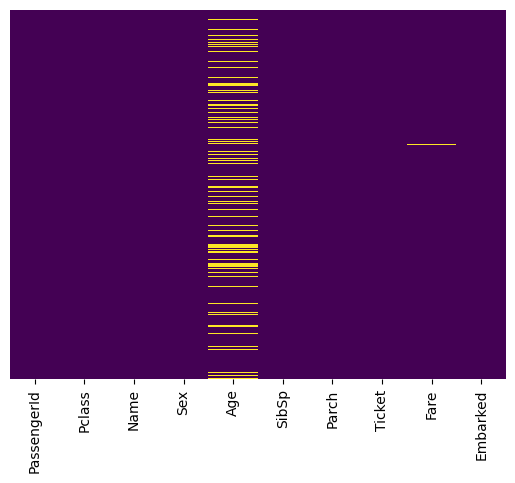

In [79]:
NAs = pd.isnull(test)
sns.heatmap(NAs, yticklabels=False,cbar=False,cmap='viridis')

In [80]:
train = train[pd.isnull(train['Fare'])==False]
# test = test[pd.isnull(test['Fare'])==False]

In [81]:
noAge = train[train['Age'].isnull() == True]

In [82]:
noAge.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q


Text(0.5, 1.0, 'Fare for NaN age')

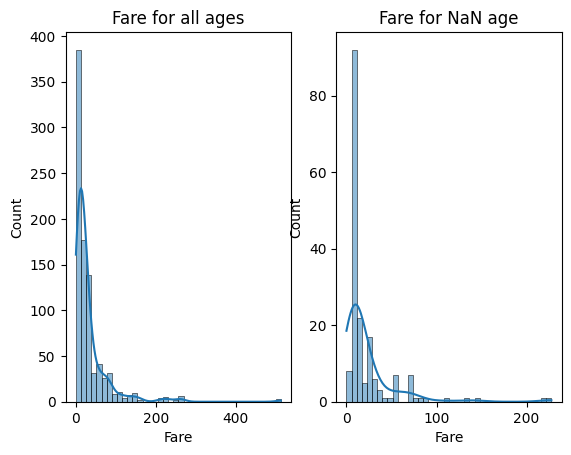

In [83]:
fig, axs = plt.subplots(ncols=2)
sns.histplot(x=train['Fare'],kde=True, ax=axs[0], bins=40)
axs[0].set_title('Fare for all ages')
sns.histplot(x=noAge['Fare'],kde=True, ax=axs[1],bins=40)
axs[1].set_title('Fare for NaN age')

Creating a rolling average for age vs fare in order to use it as a reference to fill in missing values in ages

In [84]:
noAgeNas = train[train['Age'].isnull() == False]
noAgeNas = noAgeNas.sort_values(by='Fare')
averageAgeFare = noAgeNas[['Age','Fare']].rolling(4).mean()
averageAgeFare = averageAgeFare[averageAgeFare['Age'].isnull()==False]
# noAgeNas[['Age','Fare']]

In [85]:
# noAgeNasTest = train[train['Age'].isnull() == False]
# noAgeNas = noAgeNas.sort_values(by='Fare')
# averageAgeFare = noAgeNas[['Age','Fare']].rolling(4).mean()
# averageAgeFare = averageAgeFare[averageAgeFare['Age'].isnull()==False]

In [86]:
def closest_fare(age, fare):
    if pd.isnull(age):
        return float(averageAgeFare.iloc[(averageAgeFare['Fare']-fare).abs().argsort()][:1]['Age'])
    else:
        return age

In [87]:

test[pd.isnull(test['Fare'])==True]
print(averageAgeFare.iloc[(averageAgeFare['Age']-60.5).abs().argsort()][:1])
test.loc[pd.isnull(test['Fare'])==True,'Fare']=26.55
# 1044

      Age   Fare
694  57.0  26.55


In [88]:
# noAge.head()
# train.apply(lambda x: )
# pd.isnull(noAge['Age'].iloc[0])
train['Age'] = train.apply(lambda x: closest_fare(x['Age'], x['Fare']), axis=1)
test['Age'] = test.apply(lambda x: closest_fare(x['Age'], x['Fare']), axis=1)
# float(averageAgeFare.iloc[(averageAgeFare['Fare']-200).abs().argsort()][:1]['Age'])

<AxesSubplot: >

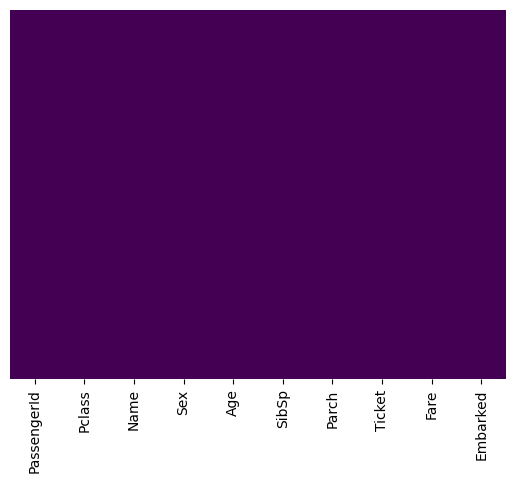

In [89]:
NAs = pd.isnull(test)
sns.heatmap(NAs, yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot: >

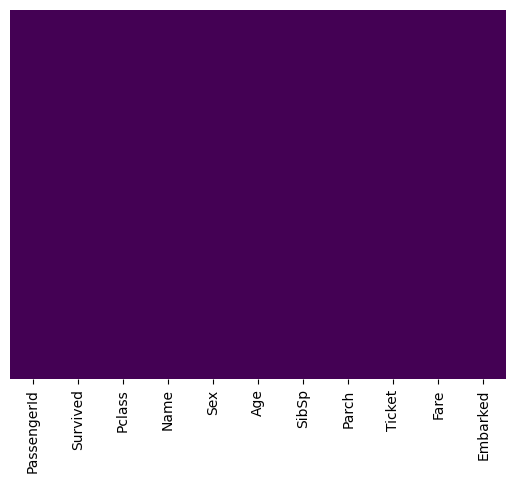

In [90]:
train = train[train['Embarked'].isnull()==False]
NAs = pd.isnull(train)
sns.heatmap(NAs, yticklabels=False,cbar=False,cmap='viridis')

In [91]:
# train.drop('PassengerId',axis=1,inplace=True)
# test.drop('PassengerId',axis=1,inplace=True)


In [92]:
train.drop('Name',axis=1,inplace=True)
train.drop('Ticket',axis=1,inplace=True)
test.drop('Name',axis=1,inplace=True)
test.drop('Ticket',axis=1,inplace=True)

In [93]:
# train.head()
males = pd.get_dummies(train['Sex'], drop_first=True)
males_test = pd.get_dummies(test['Sex'], drop_first=True)

In [94]:
train['Male'] = males
train.drop('Sex',axis=1,inplace=True)
test['Male'] = males_test
test.drop('Sex',axis=1,inplace=True)

In [95]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)
embark.rename(columns={'Q':'Embark_Q', 'S':'Embark_S'},inplace=True)
embark_test = pd.get_dummies(test['Embarked'], drop_first=True)
embark_test.rename(columns={'Q':'Embark_Q', 'S':'Embark_S'},inplace=True)

train = pd.concat([train,embark], axis=1)
train.drop('Embarked', axis=1, inplace=True)
test = pd.concat([test,embark_test], axis=1)
test.drop('Embarked', axis=1, inplace=True)

Model part

In [96]:
from sklearn.model_selection import train_test_split

In [161]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [187]:
dtree = DecisionTreeClassifier()
rfc = RandomForestClassifier()
knn = KNeighborsClassifier(n_neighbors=1)
logmodel = LogisticRegression(max_iter=1000, tol=1e-8, C=1)

dtree.fit(X_train,y_train)
rfc.fit(X_train,y_train)
knn.fit(X_train,y_train)
logmodel.fit(X_train,y_train)

LogisticRegression(C=1, max_iter=1000, tol=1e-08)

In [188]:
preds_dtree = dtree.predict(X_test)
preds_rfc = rfc.predict(X_test)
preds_knn = knn.predict(X_test)
preds_logmodel = logmodel.predict(X_test)

In [102]:
from sklearn.metrics import classification_report,confusion_matrix

In [189]:
print("decision tree:")
print(confusion_matrix(y_test,preds_dtree))
print(classification_report(y_test,preds_dtree))

print("Random forest classifier:")
print(confusion_matrix(y_test,preds_rfc))
print(classification_report(y_test,preds_rfc))


decision tree:
[[107  29]
 [ 24  63]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       136
           1       0.68      0.72      0.70        87

    accuracy                           0.76       223
   macro avg       0.75      0.76      0.75       223
weighted avg       0.77      0.76      0.76       223

Random forest classifier:
[[128   8]
 [ 22  65]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.90       136
           1       0.89      0.75      0.81        87

    accuracy                           0.87       223
   macro avg       0.87      0.84      0.85       223
weighted avg       0.87      0.87      0.86       223



In [179]:
print("KNeighbors classifier:")
print(confusion_matrix(y_test,preds_knn))
print(classification_report(y_test,preds_knn))

KNeighbors classifier:
[[81 31]
 [33 33]]
              precision    recall  f1-score   support

           0       0.71      0.72      0.72       112
           1       0.52      0.50      0.51        66

    accuracy                           0.64       178
   macro avg       0.61      0.61      0.61       178
weighted avg       0.64      0.64      0.64       178



In [174]:
print("Logistic regression classifier:")
print(confusion_matrix(y_test,preds_logmodel))
print(classification_report(y_test,preds_logmodel))

Logistic regression classifier:
[[139  28]
 [ 43  57]]
              precision    recall  f1-score   support

           0       0.76      0.83      0.80       167
           1       0.67      0.57      0.62       100

    accuracy                           0.73       267
   macro avg       0.72      0.70      0.71       267
weighted avg       0.73      0.73      0.73       267



In [111]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [163]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [122]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.callbacks import EarlyStopping

In [226]:
# model = Sequential()
# model.add(Dense(9, activation='relu'))
# model.add(Dropout(0.6))

# model.add(Dense(5, activation='relu'))
# model.add(Dropout(0.6))

# # model.add(Dense(10, activation='relu'))
# # model.add(Dropout(0.3))

# model.add(Dense(1, activation='sigmoid'))

model = tf.keras.models.Sequential(
[
    tf.keras.layers.Dense(9, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(604, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(604, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(604, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(604, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(604, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(604, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(604, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam')

early_stop = EarlyStopping(monitor='val_loss', mode='min',verbose=1,patience=20)

In [227]:
model.fit(x=X_train, y=y_train, epochs=200, batch_size=256, validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/200
3/3 [==============================] - 1s 87ms/step - loss: 5.1982 - val_loss: 1.1630
Epoch 2/200
3/3 [==============================] - 0s 39ms/step - loss: 1.0913 - val_loss: 0.7136
Epoch 3/200
3/3 [==============================] - 0s 36ms/step - loss: 0.7523 - val_loss: 0.6778
Epoch 4/200
3/3 [==============================] - 0s 35ms/step - loss: 0.7001 - val_loss: 0.6863
Epoch 5/200
3/3 [==============================] - 0s 34ms/step - loss: 0.7009 - val_loss: 0.6811
Epoch 6/200
3/3 [==============================] - 0s 35ms/step - loss: 0.6893 - val_loss: 0.6773
Epoch 7/200
3/3 [==============================] - 0s 35ms/step - loss: 0.6746 - val_loss: 0.6743
Epoch 8/200
3/3 [==============================] - 0s 34ms/step - loss: 0.6807 - val_loss: 0.6694
Epoch 9/200
3/3 [==============================] - 0s 35ms/step - loss: 0.6819 - val_loss: 0.6679
Epoch 10/200
3/3 [==============================] - 0s 36ms/step - loss: 0.6802 - val_loss: 0.6801
Epoch 11/200
3/3 [=

<AxesSubplot: >

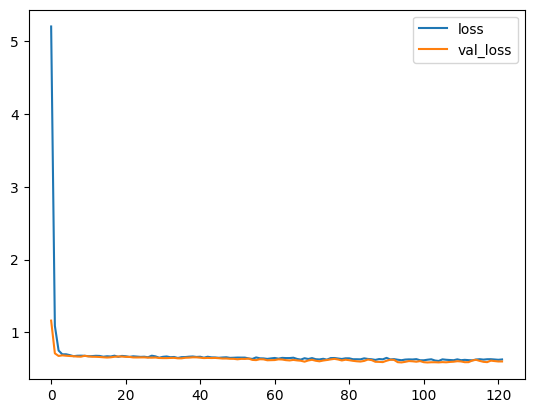

In [228]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

In [229]:
y_pred = np.where(model.predict(X_test)<0.5,0,1)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

7/7 [==============================] - 0s 4ms/step
[[126  10]
 [ 59  28]]
              precision    recall  f1-score   support

           0       0.68      0.93      0.79       136
           1       0.74      0.32      0.45        87

    accuracy                           0.69       223
   macro avg       0.71      0.62      0.62       223
weighted avg       0.70      0.69      0.65       223



In [191]:
test_preds = rfc.predict(test)

In [192]:
output = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': test_preds})
output.to_csv('submission.csv', index=False)